In [93]:
from IPython.display import display

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from SessionSmith import ssm

from sklearn.model_selection import train_test_split

## Session管理, 初期化 (SessionSmith==2.0.0)

In [28]:
ssm.init()

✓ SSM already initialized in /Users/yutotakagi/Develop/ass-production-management2/notebook


In [29]:
df = pd.read_excel('../data/raw/kadai.xlsx')
df.head(2)

,process_end_time,final_mes_time,OV,X1,X2,X3,X4,X5,X6,X7,...,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83
0,2016-08-14 23:07:00,2016-09-24 04:22:00,111.2886,22.98,1.37,797.2,0.67,0.15,0.08,67.15,...,0.1,0.04,6.4,0.58,0.0,4.1,0.0,0.01,0.16,0.04
1,2016-08-14 23:07:00,2016-09-24 10:12:00,201.5617,22.45,9.40,803.8,0.68,0.15,0.08,56.11,...,0.1,0.04,6.4,0.58,0.0,4.1,0.0,0.01,0.16,0.04


In [30]:
df.shape

(2276, 86)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2276 entries, 0 to 2275
Data columns (total 86 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   process_end_time  2276 non-null   datetime64[ns]
 1   final_mes_time    2276 non-null   datetime64[ns]
 2   OV                2276 non-null   float64       
 3   X1                2276 non-null   float64       
 4   X2                2276 non-null   float64       
 5   X3                2276 non-null   float64       
 6   X4                2276 non-null   float64       
 7   X5                2276 non-null   float64       
 8   X6                2276 non-null   float64       
 9   X7                2276 non-null   float64       
 10  X8                2276 non-null   float64       
 11  X9                2276 non-null   float64       
 12  X10               2276 non-null   float64       
 13  X11               2276 non-null   float64       
 14  X12               2276 n

## 欠損値の確認

> 全列で欠損がないことを確認できた

In [32]:
df.isnull().sum().sort_values(ascending=False)

process_end_time    0
X52                 0
X60                 0
X59                 0
X58                 0
                   ..
X25                 0
X24                 0
X23                 0
X22                 0
X83                 0
Length: 86, dtype: int64

## 各変数の推移の確認

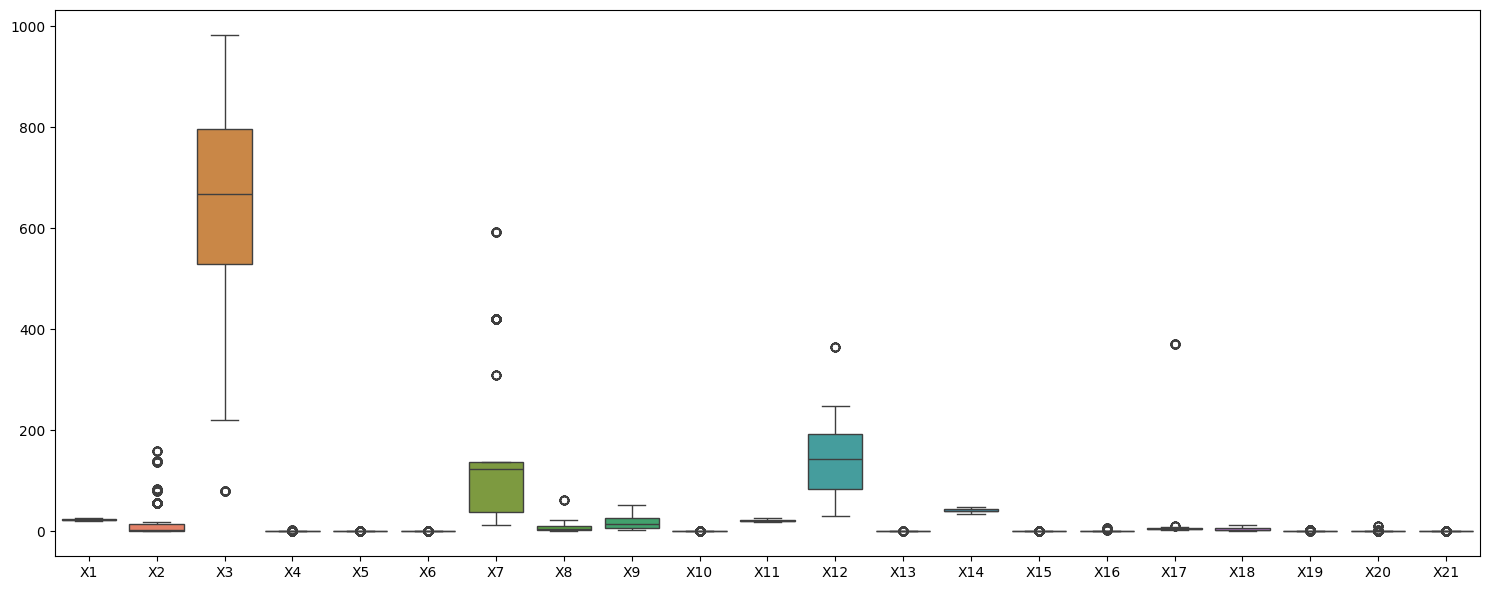

In [65]:
value_df = df[[f"X{i}" for i in range(1, 22)]]
desc = value_df.describe().T

plt.figure(figsize=(15, 6))
sns.boxplot(data=value_df, orient="v")

plt.tight_layout()
plt.show()


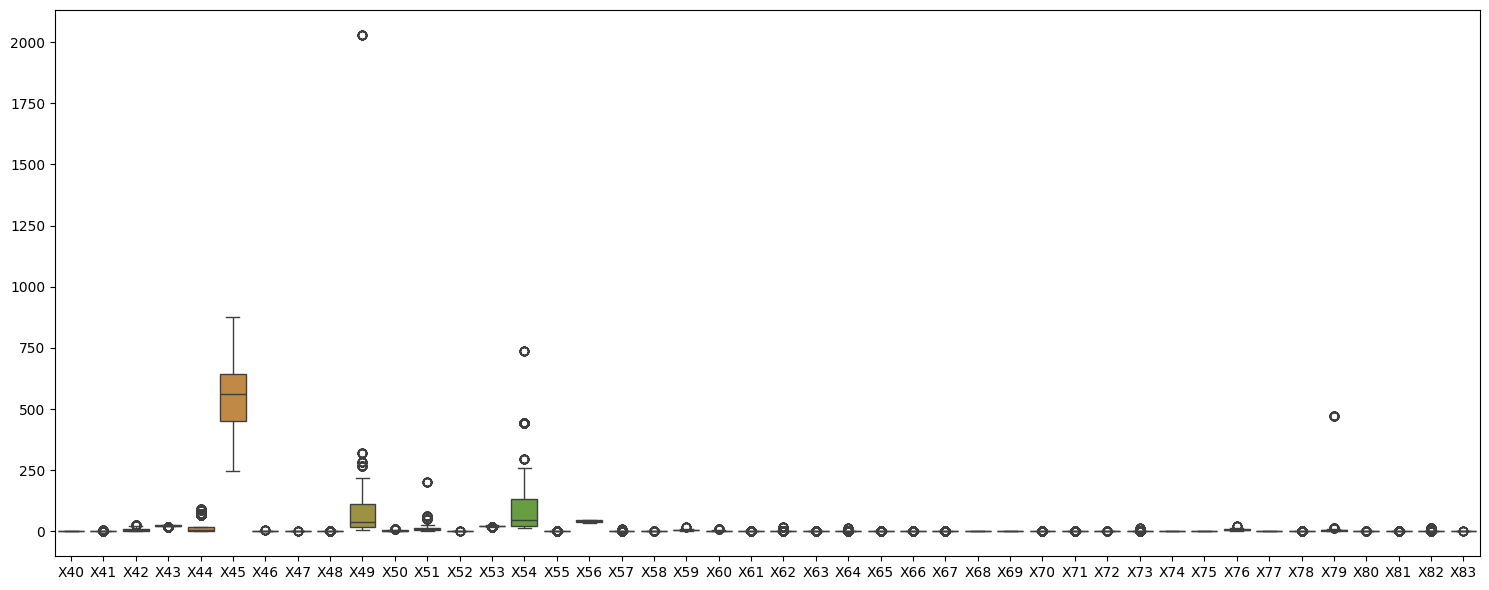

In [62]:
value_df = df[[f"X{i}" for i in range(40, 84)]]
desc = value_df.describe().T

plt.figure(figsize=(15, 6))
sns.boxplot(data=value_df, orient="v")

plt.tight_layout()
plt.show()


In [67]:
from sklearn.preprocessing import StandardScaler

# X1~X83, すべて標準化
columns_to_scale = [f"X{i}" for i in range(1, 84)]
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[columns_to_scale])
scaled_df = pd.DataFrame(scaled_values, columns=columns_to_scale)

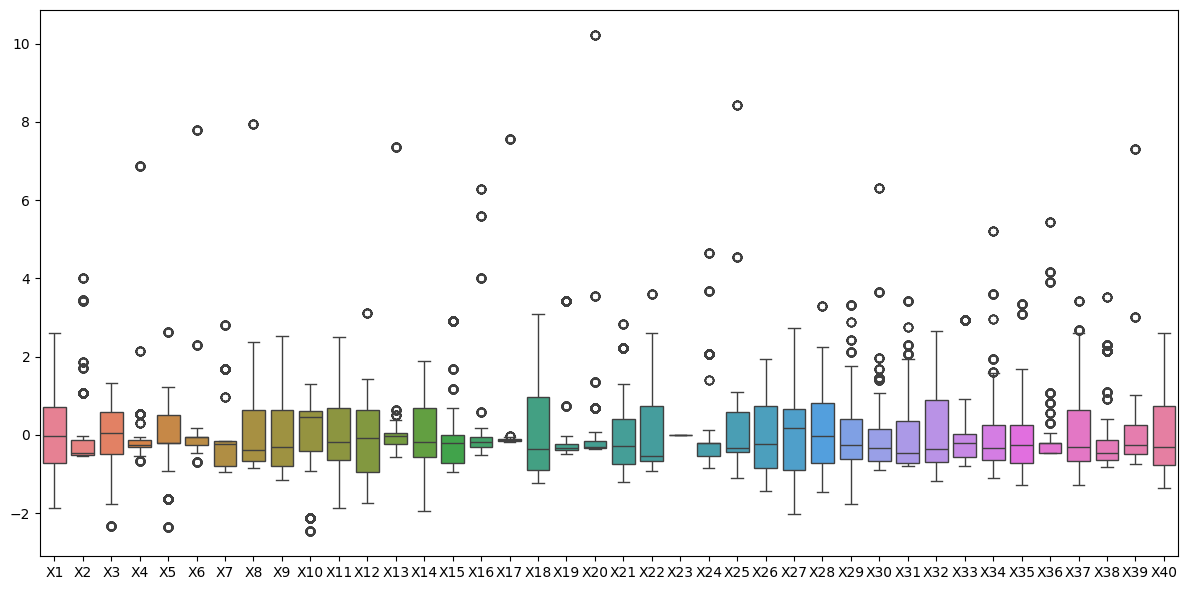

In [74]:
scaled_df_1 = scaled_df[[f"X{i}" for i in range(1, 41)]]
plt.figure(figsize=(12, 6))
sns.boxplot(data=scaled_df_1, orient="v")
plt.tight_layout()
plt.show()

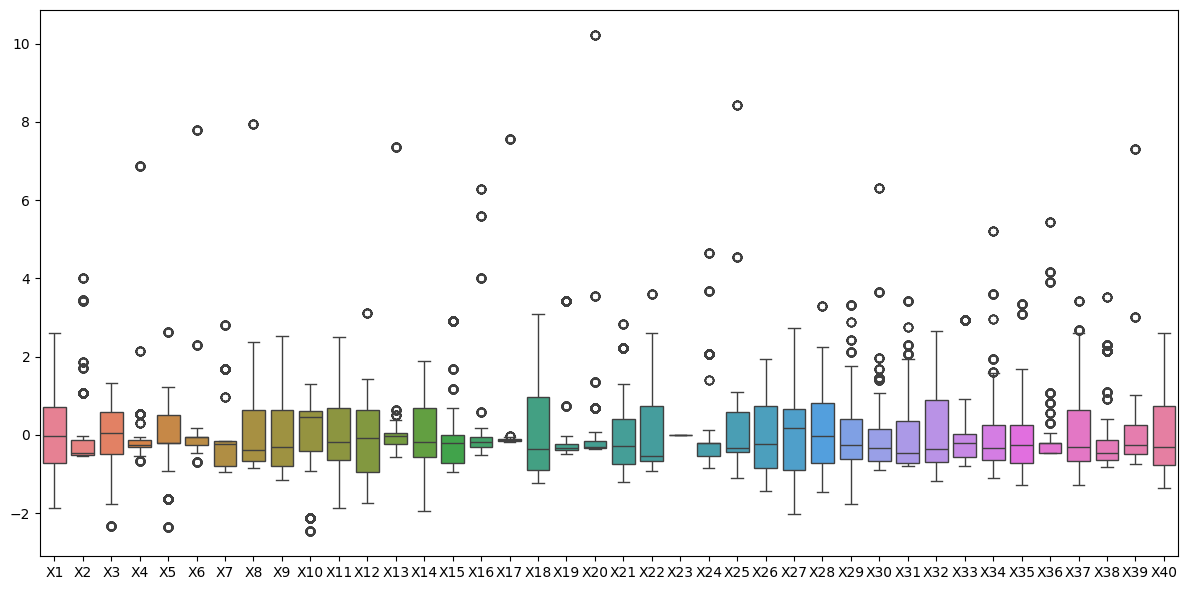

In [73]:
scaled_df_2 = scaled_df[[f"X{i}" for i in range(41, 84)]]
plt.figure(figsize=(12, 6))
sns.boxplot(data=scaled_df_1, orient="v")
plt.tight_layout()
plt.show()

In [ ]:
#"process_end_time"と"final_mes_time"を時系列オブジェクトに変換する
df["process_end_time"] = pd.to_datetime(df["process_end_time"])
df["final_mes_time"] = pd.to_datetime(df["final_mes_time"])

#最後の500レコードをテストデータとする
learn = df[0:1776]
test = df[1776:2276]

#インデックスをリセットする
learn = learn.reset_index(drop=True)
test = test.reset_index(drop=True)

#テストデータの最初の1レコードの"process_end_time"より前のlearnデータを取り出す
learn = learn[learn["final_mes_time"] < test['process_end_time'][0]]

In [35]:
learn.to_csv('../data/processed/learn.csv', index=False)
test.to_csv('../data/processed/test.csv', index=False)

In [36]:
learn.shape

(1155, 86)

## 訓練データとテストデータを区分して保存

In [37]:
learn_y = learn['OV']
learn.drop(columns=['OV'], inplace=True)
learn_X = learn

test_y = test['OV']
test.drop(columns=['OV'], inplace=True)
test_X = test

learn_X.to_csv('../data/interim/learn_X.csv', index=False)
learn_y.to_csv('../data/interim/learn_y.csv', index=False)
test_X.to_csv('../data/interim/test_X.csv', index=False)
test_y.to_csv('../data/interim/test_y.csv', index=False)

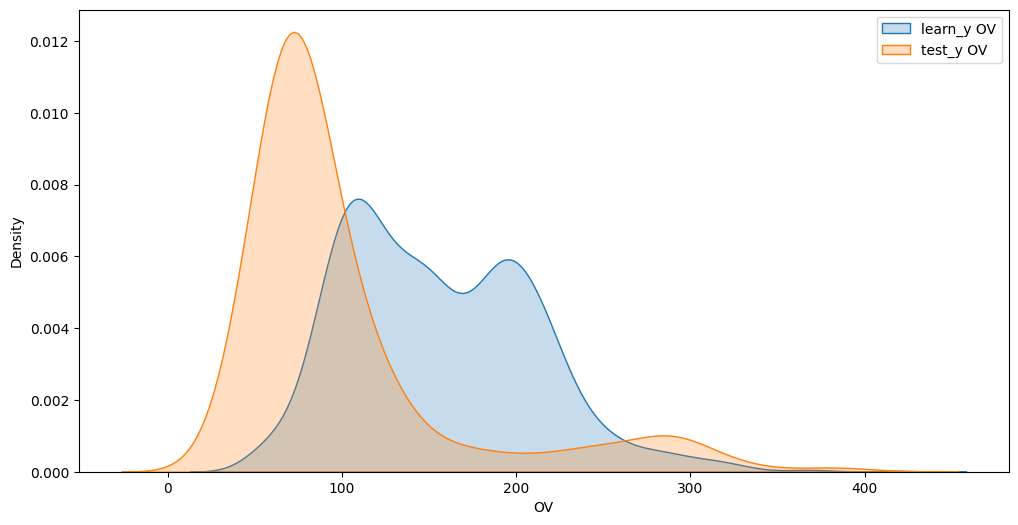

In [76]:
plt.figure(figsize=(12,6))
sns.kdeplot(learn_y, label='learn_y OV', fill=True)
sns.kdeplot(test_y, label='test_y OV', fill=True)
plt.xlabel('OV')
plt.ylabel('Density')
plt.legend()
plt.show()

In [87]:
fig_lists = []
temp = []
for i in range(1, 84):
    if len(temp) < 5:
        temp.append(f"X{i}")
    elif len(temp) == 5:
        temp.append(f"X{i}")
        fig_lists.append(temp)
        temp = []
fig_lists.append(temp)

In [89]:
fig_lists

[['X1', 'X2', 'X3', 'X4', 'X5', 'X6'],
 ['X7', 'X8', 'X9', 'X10', 'X11', 'X12'],
 ['X13', 'X14', 'X15', 'X16', 'X17', 'X18'],
 ['X19', 'X20', 'X21', 'X22', 'X23', 'X24'],
 ['X25', 'X26', 'X27', 'X28', 'X29', 'X30'],
 ['X31', 'X32', 'X33', 'X34', 'X35', 'X36'],
 ['X37', 'X38', 'X39', 'X40', 'X41', 'X42'],
 ['X43', 'X44', 'X45', 'X46', 'X47', 'X48'],
 ['X49', 'X50', 'X51', 'X52', 'X53', 'X54'],
 ['X55', 'X56', 'X57', 'X58', 'X59', 'X60'],
 ['X61', 'X62', 'X63', 'X64', 'X65', 'X66'],
 ['X67', 'X68', 'X69', 'X70', 'X71', 'X72'],
 ['X73', 'X74', 'X75', 'X76', 'X77', 'X78'],
 ['X79', 'X80', 'X81', 'X82', 'X83']]

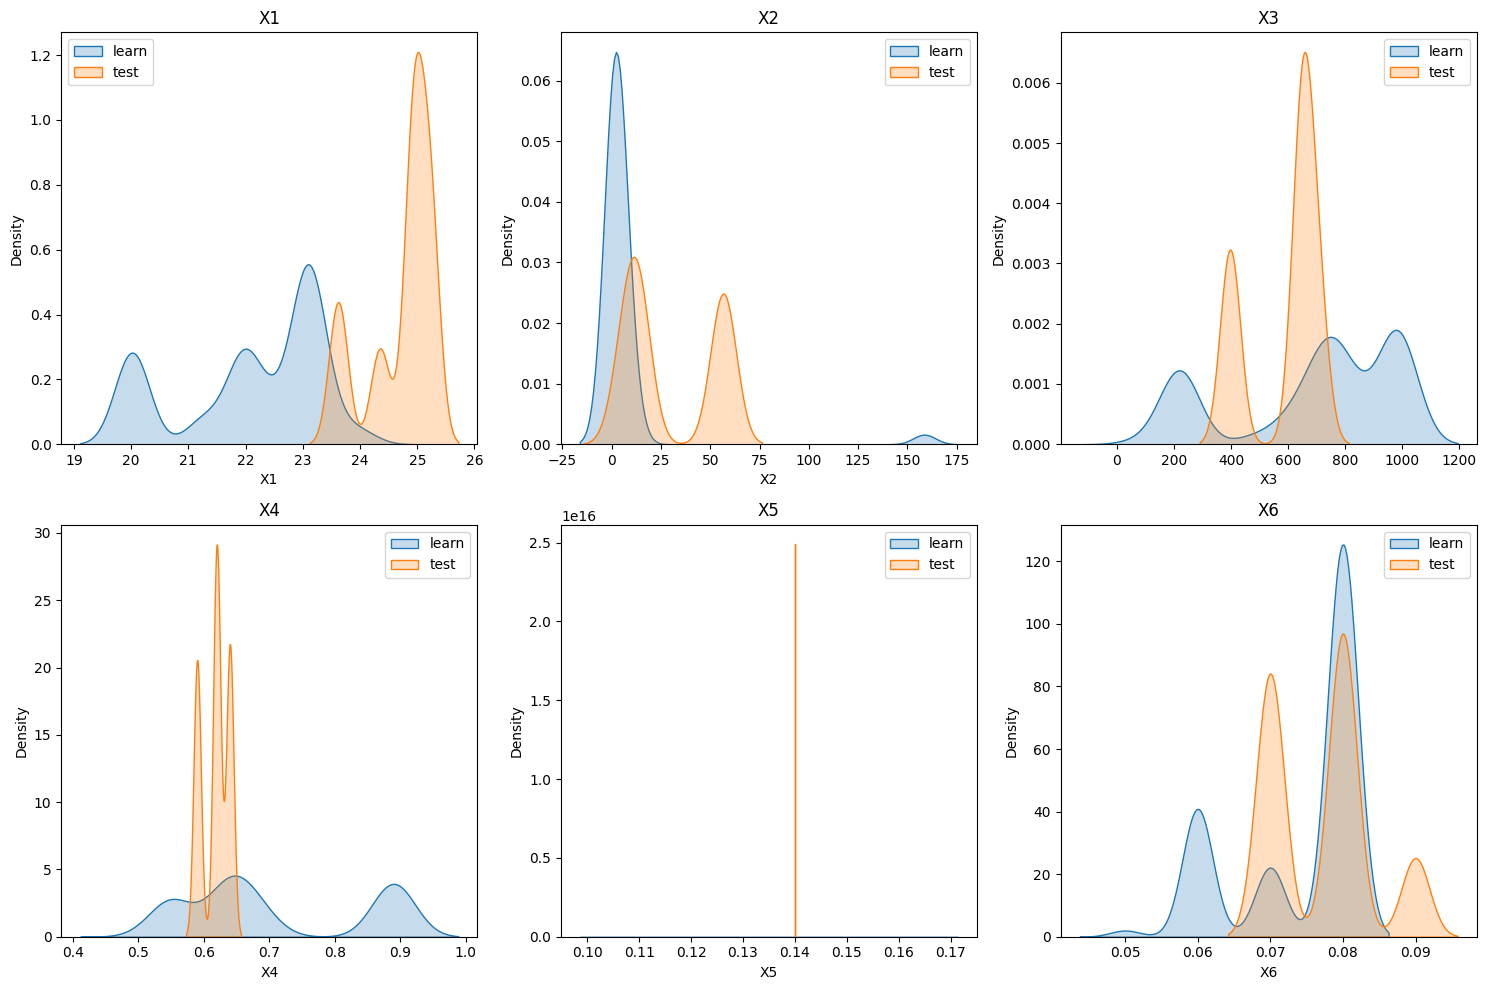

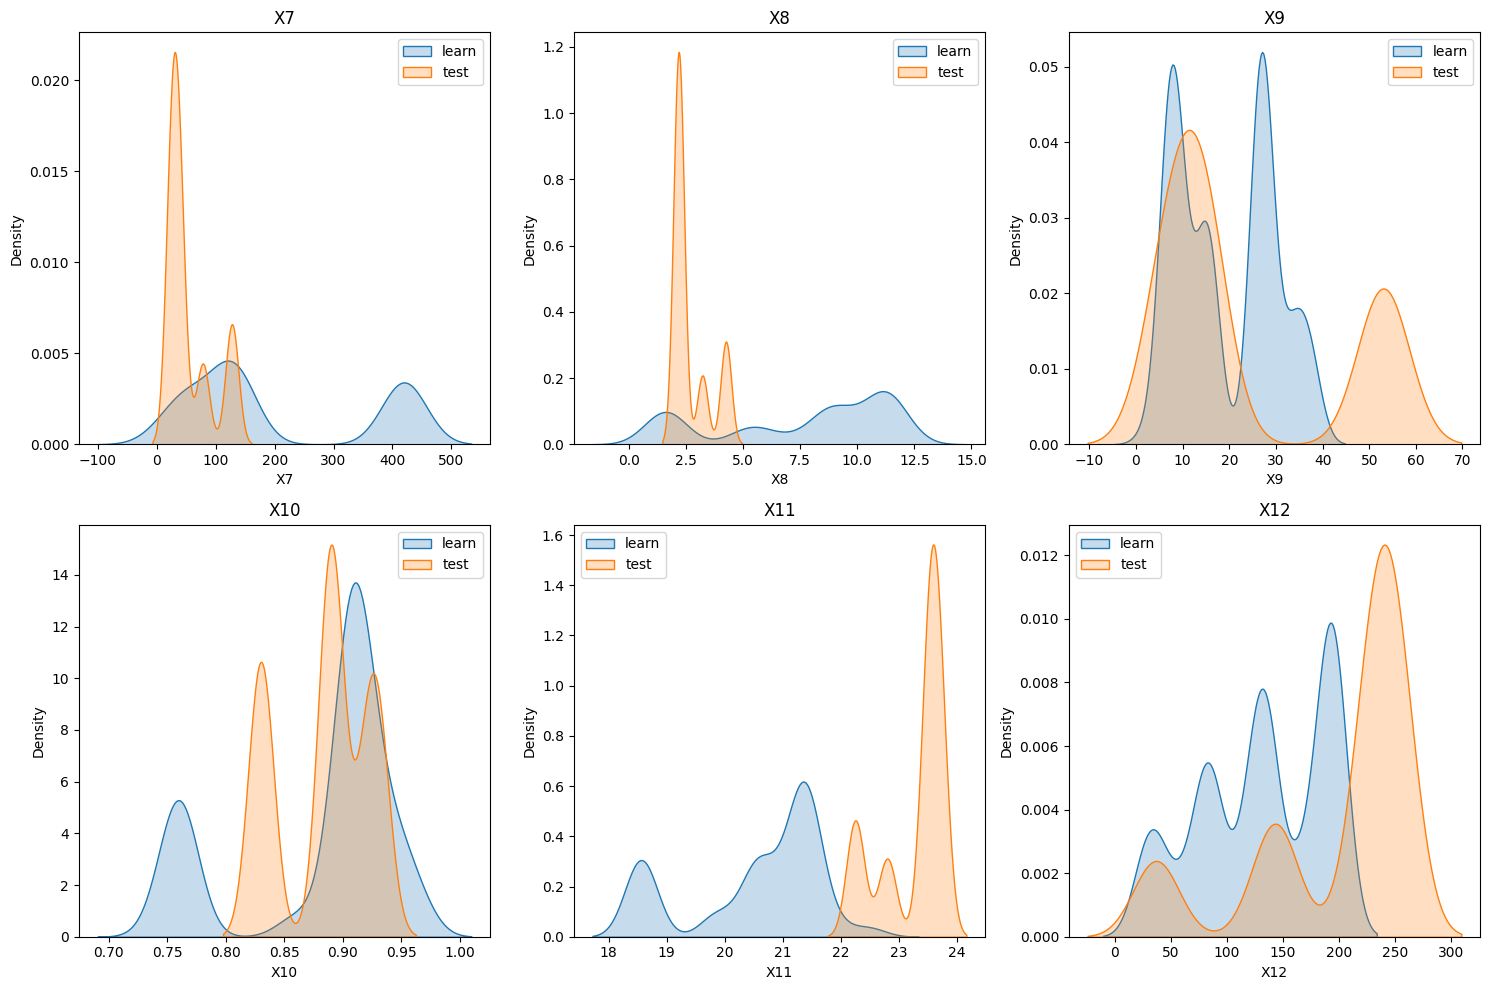

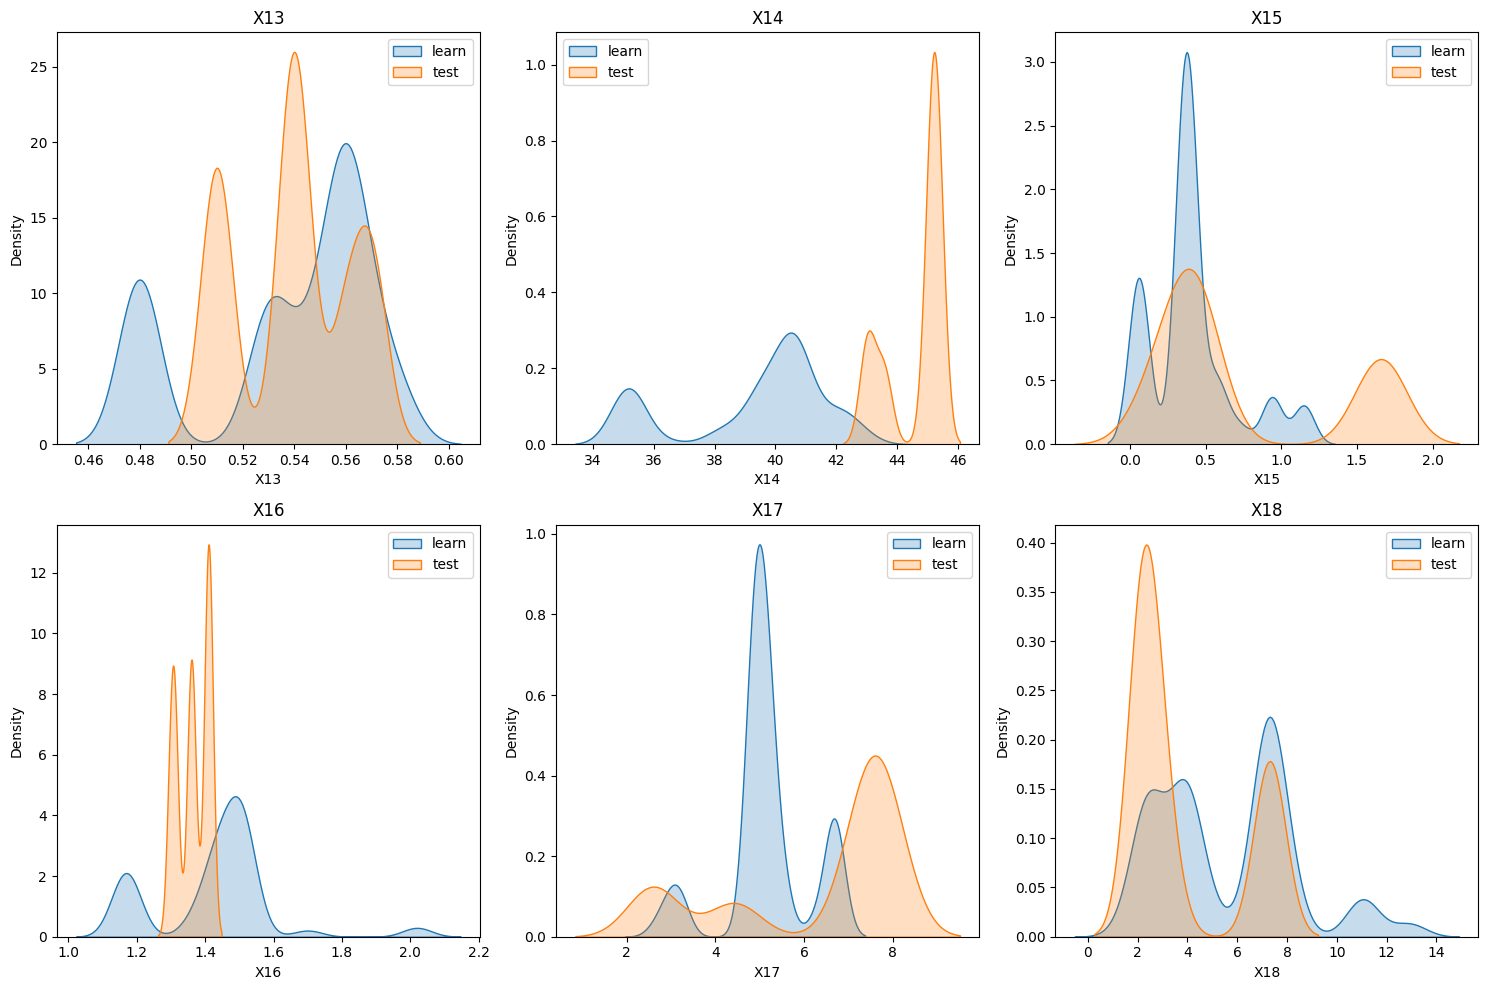

/var/folders/3b/3hxgpzc57b70j4b1d7my6wfc0000gn/T/ipykernel_58169/1142292277.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(learn[col], label='learn', fill=True)
/var/folders/3b/3hxgpzc57b70j4b1d7my6wfc0000gn/T/ipykernel_58169/1142292277.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(test[col], label='test', fill=True)
/var/folders/3b/3hxgpzc57b70j4b1d7my6wfc0000gn/T/ipykernel_58169/1142292277.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


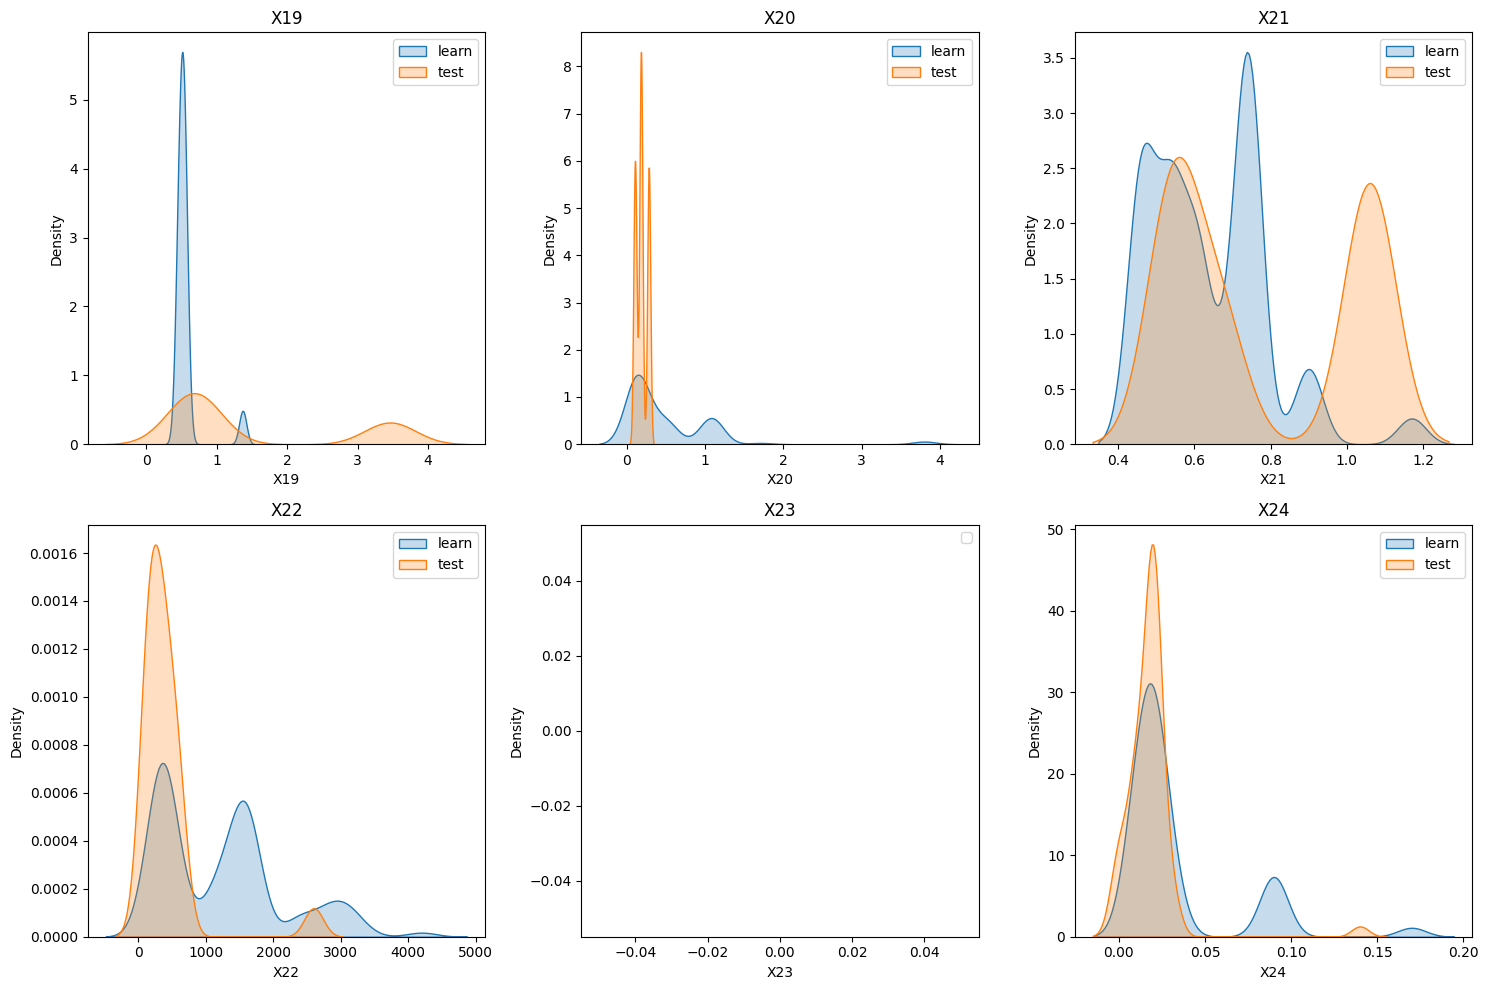

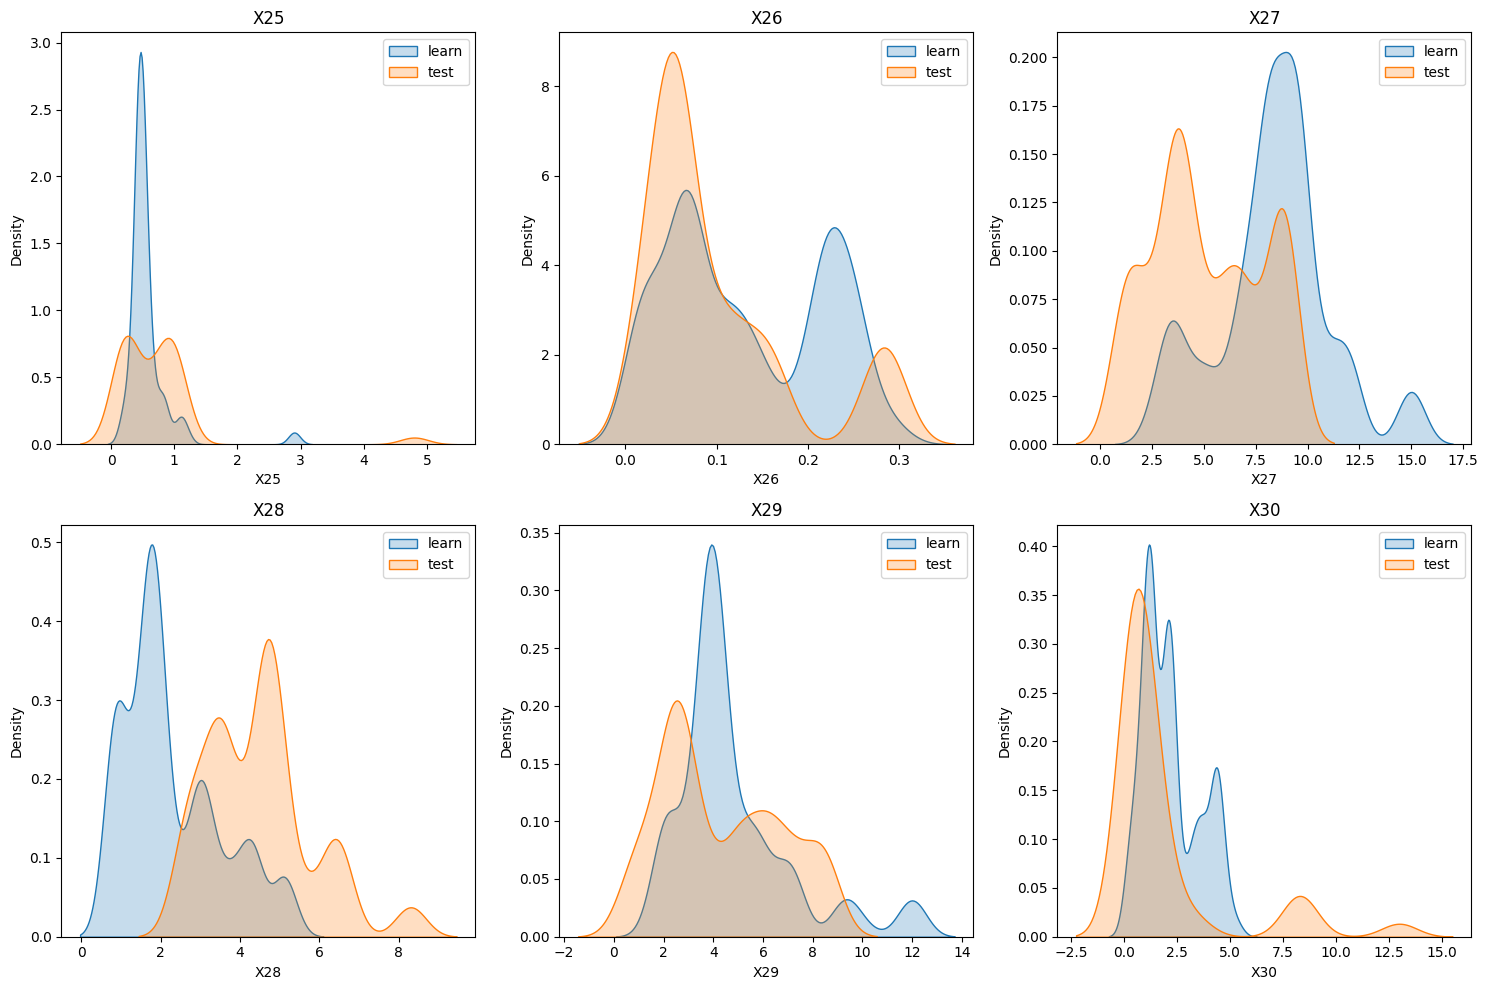

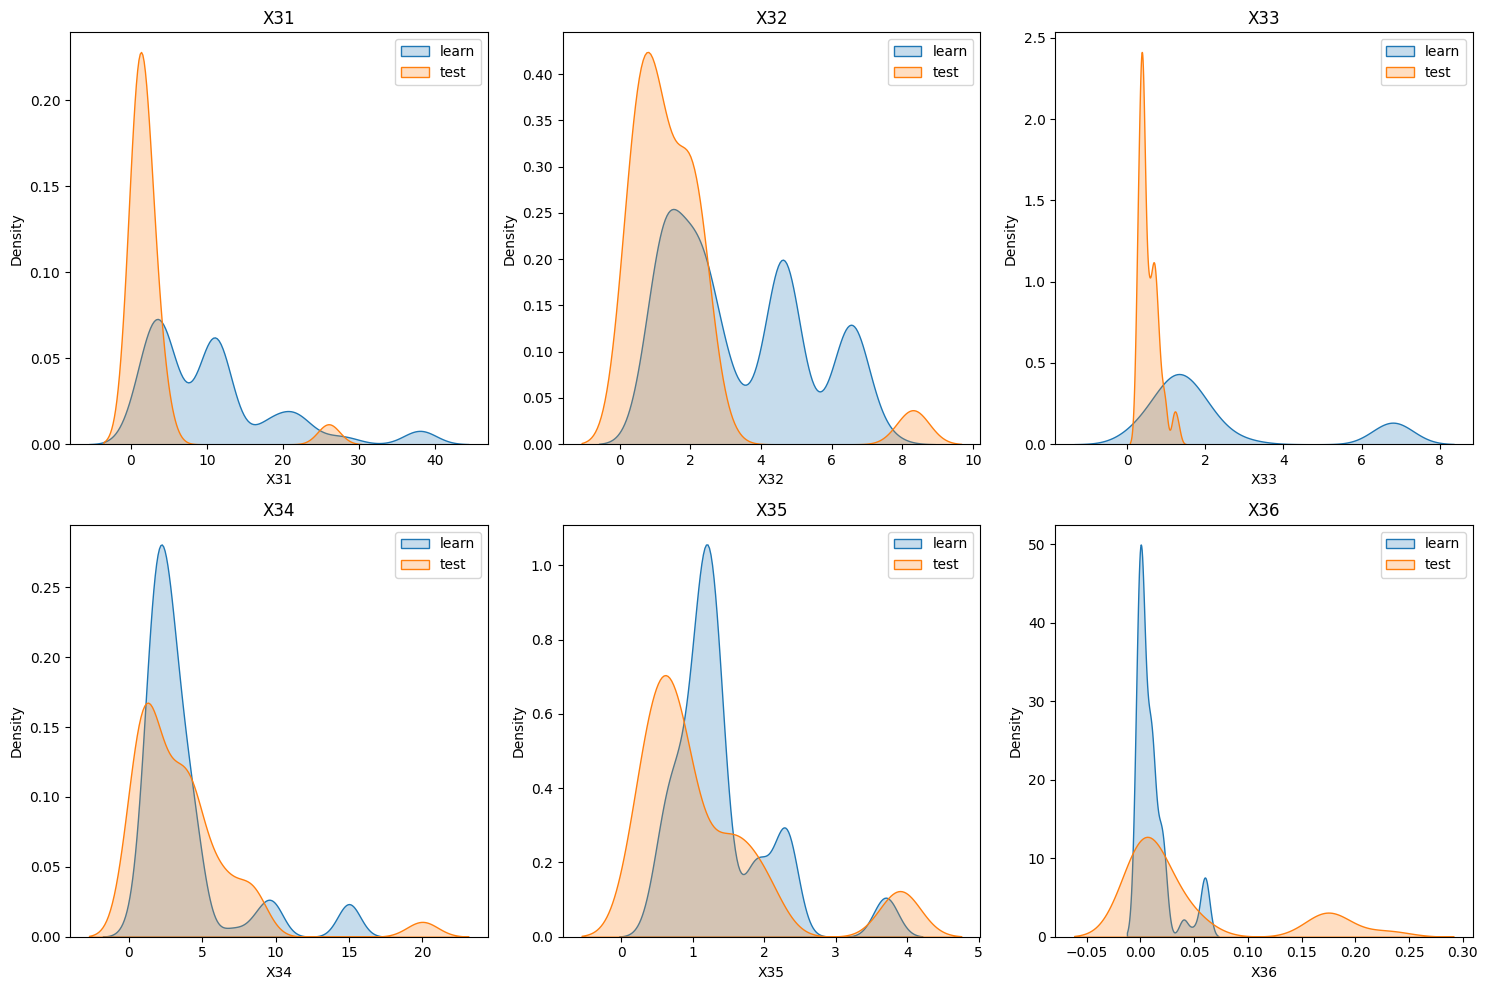

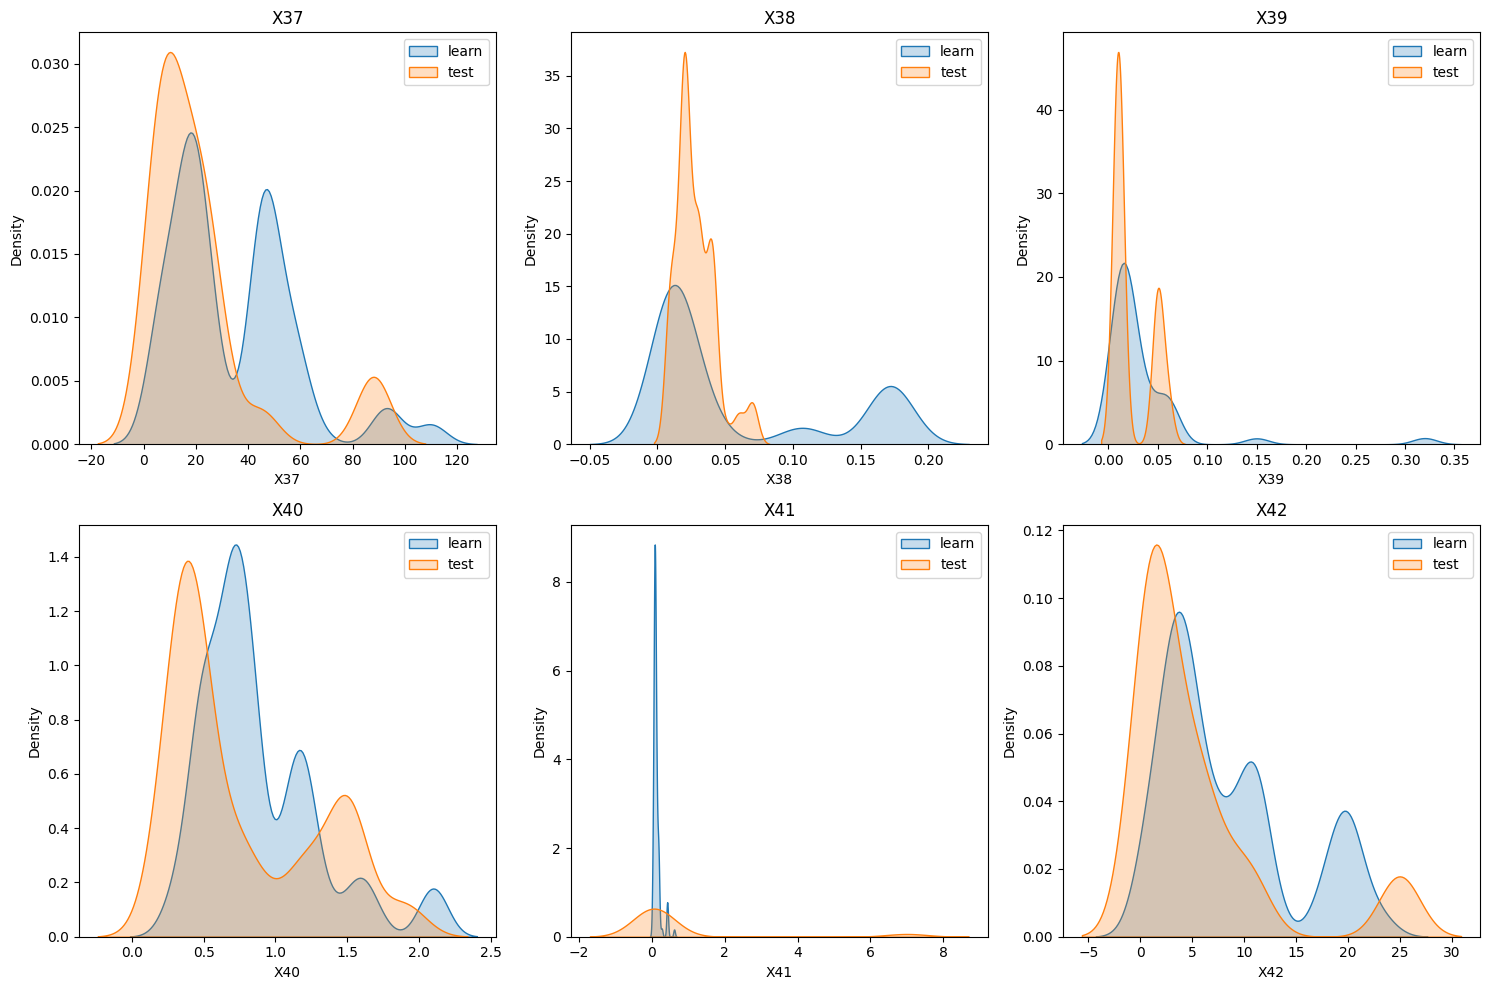

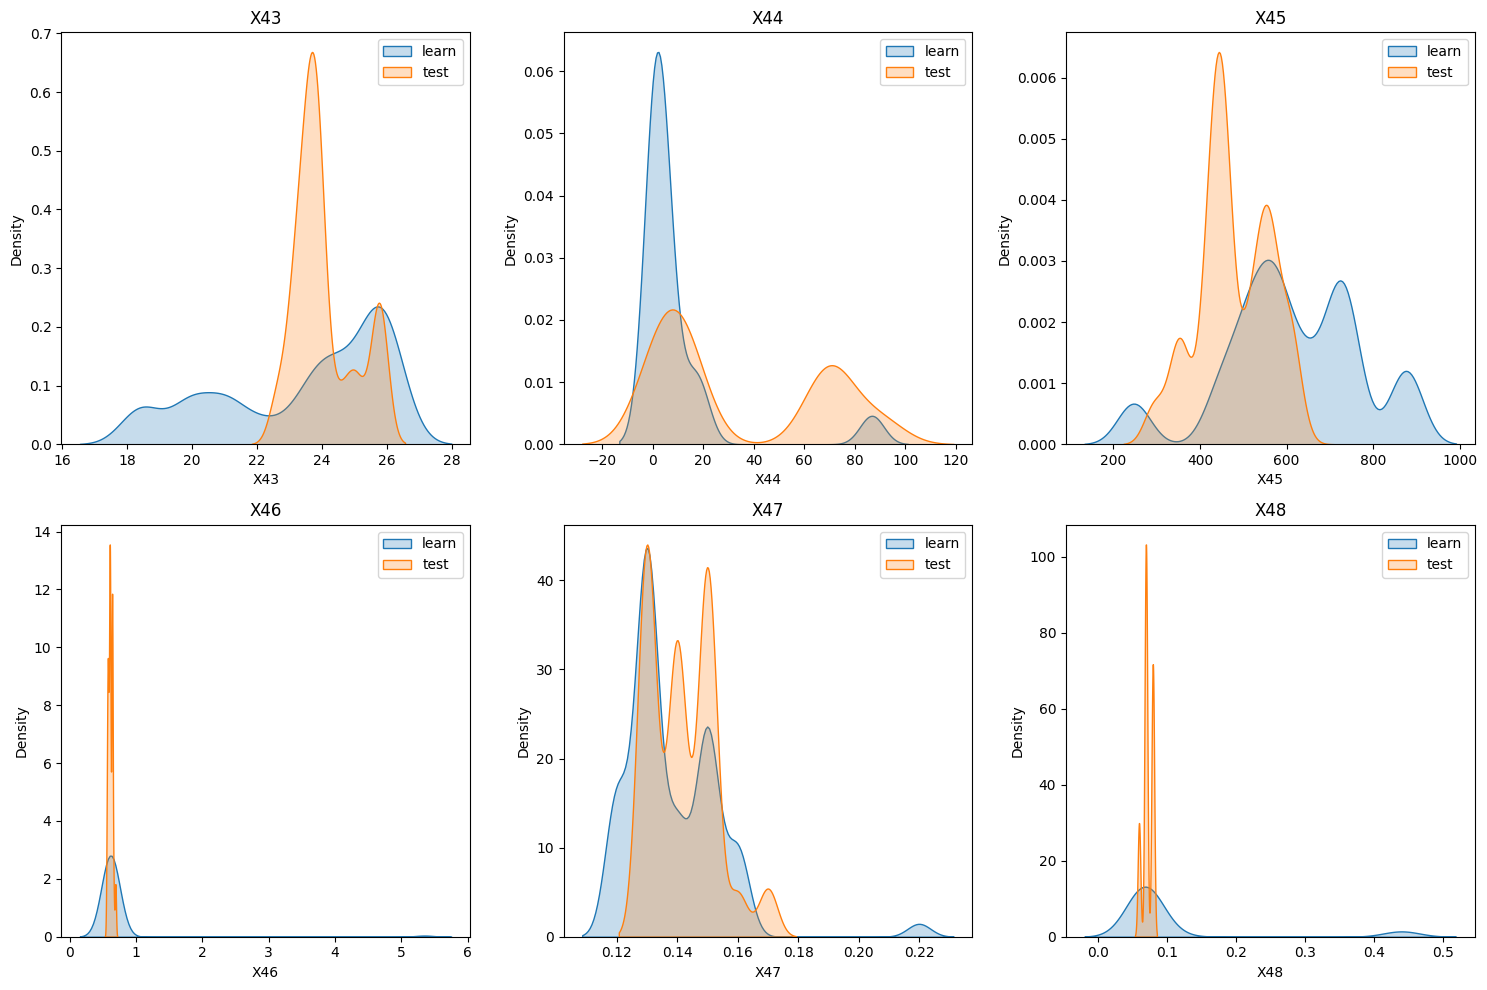

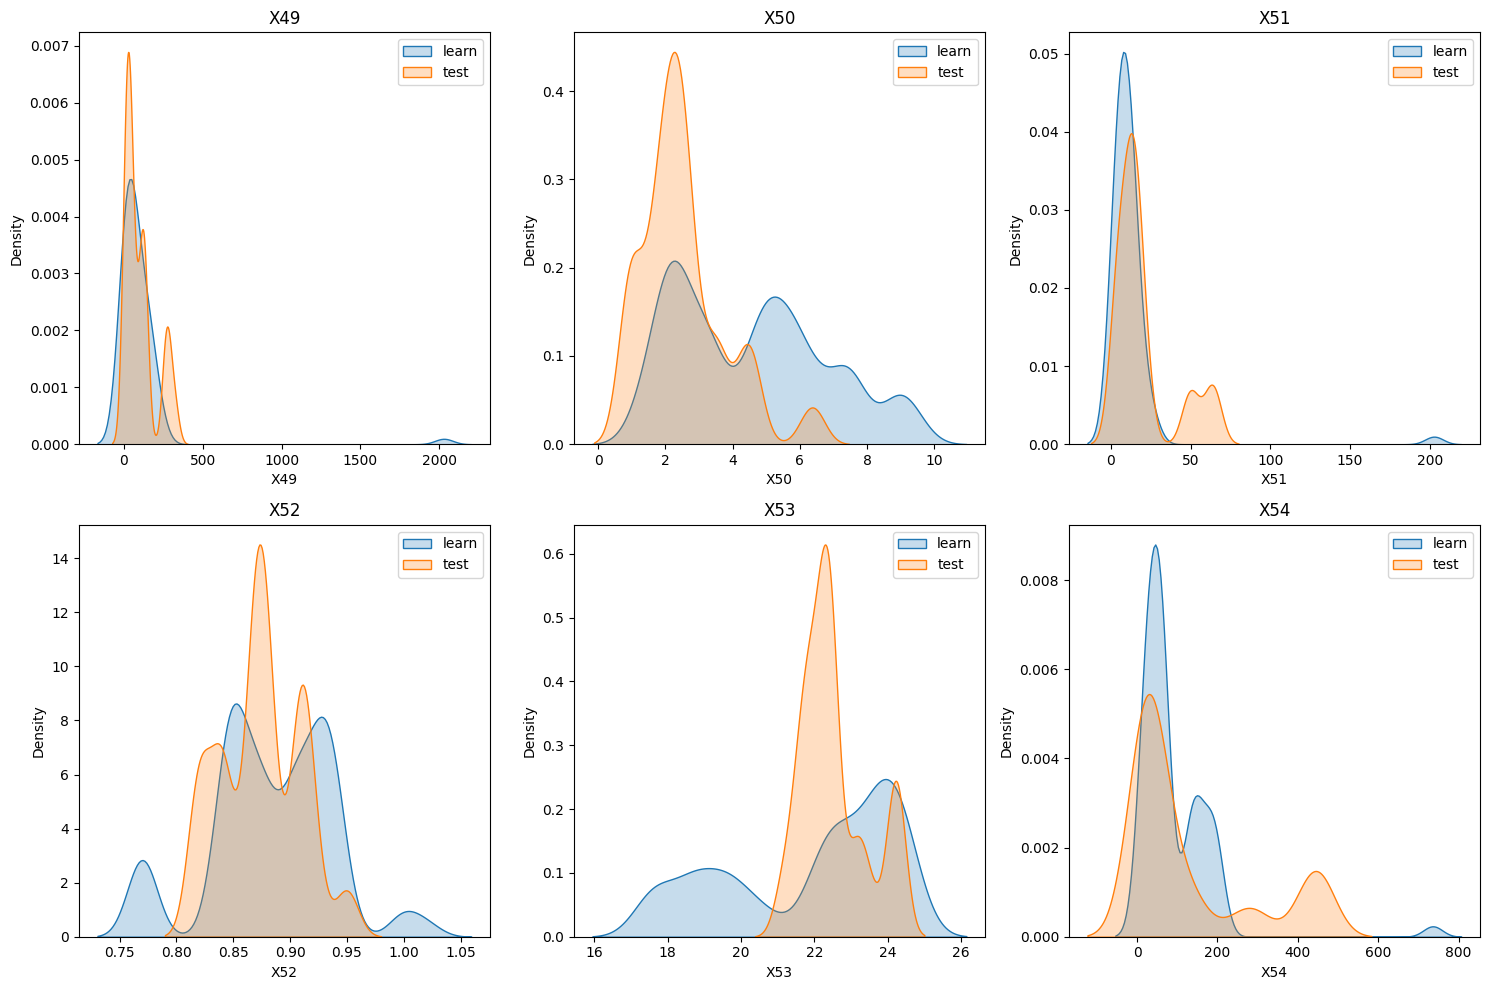

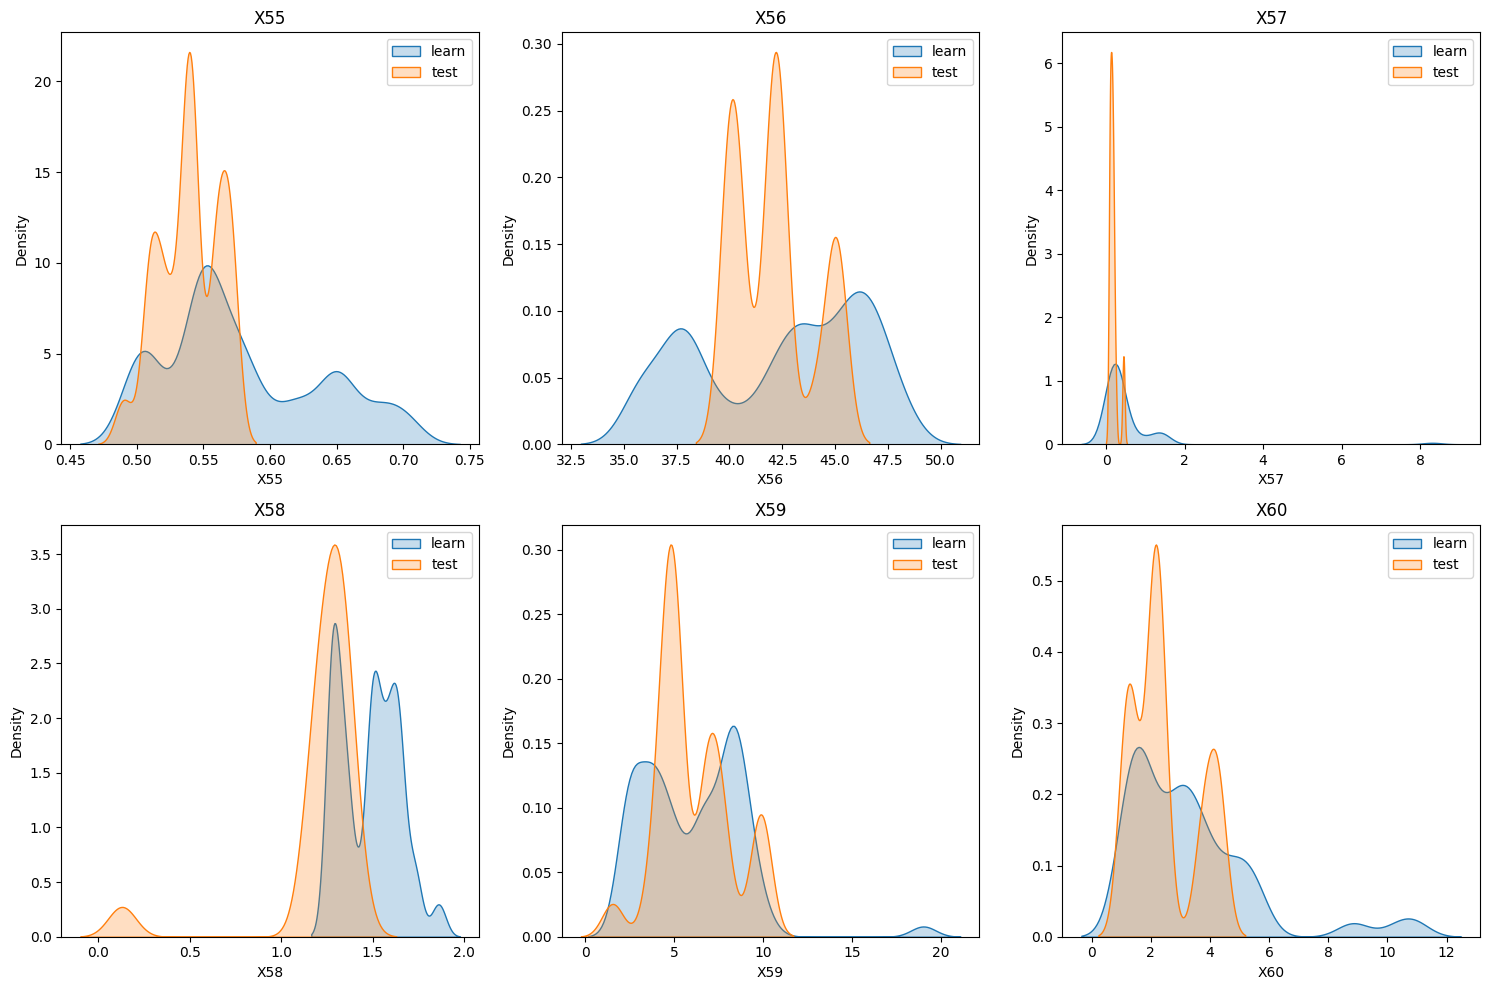

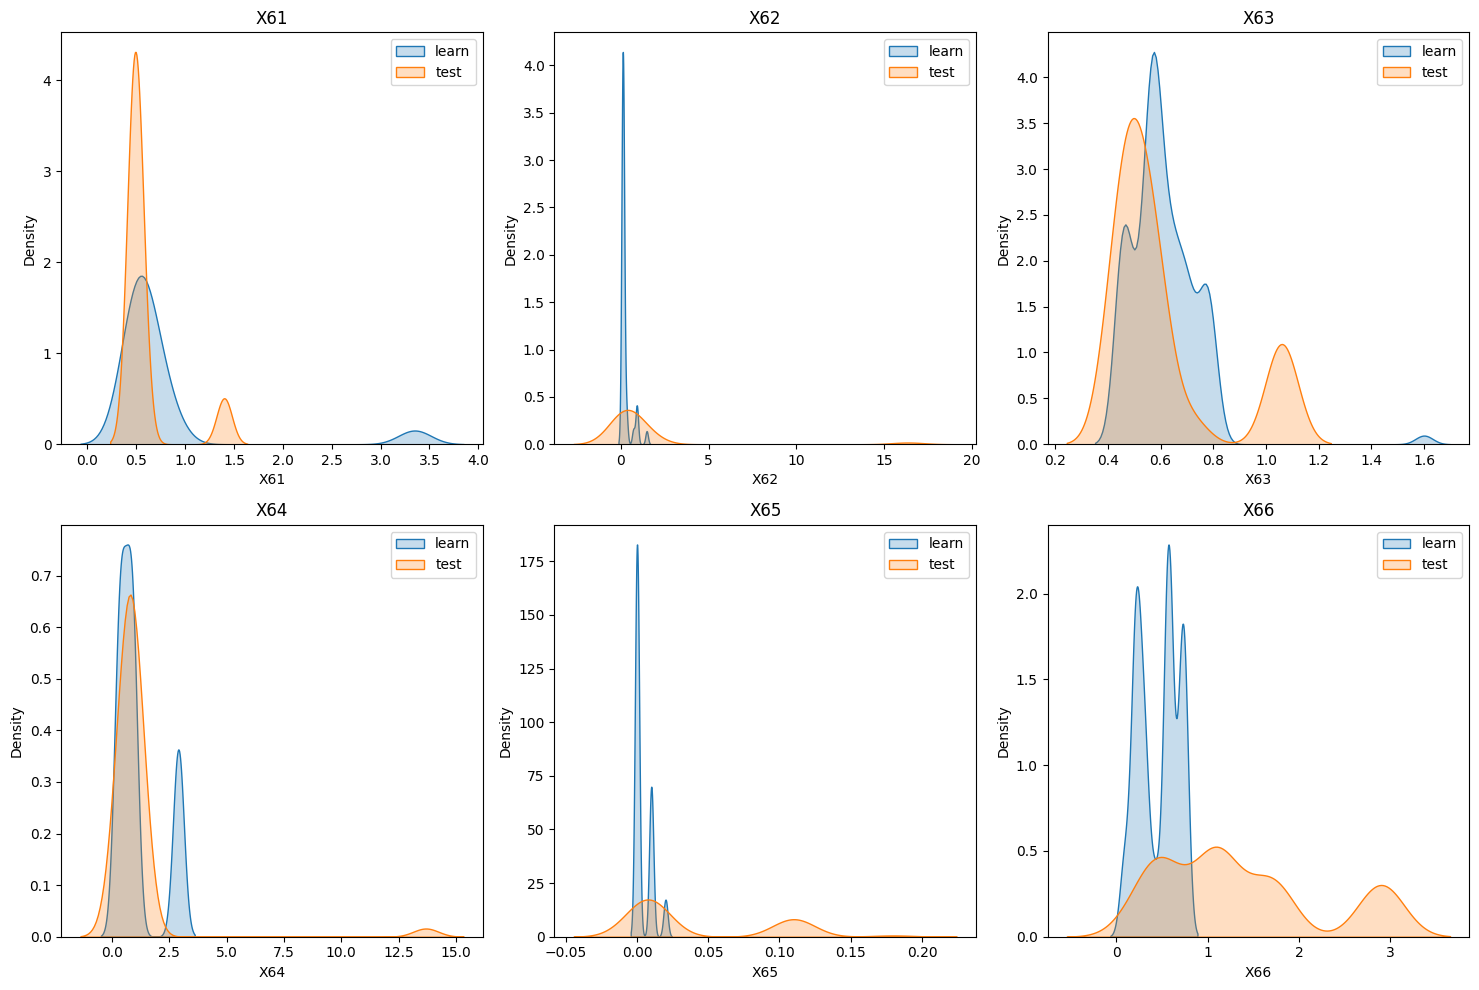

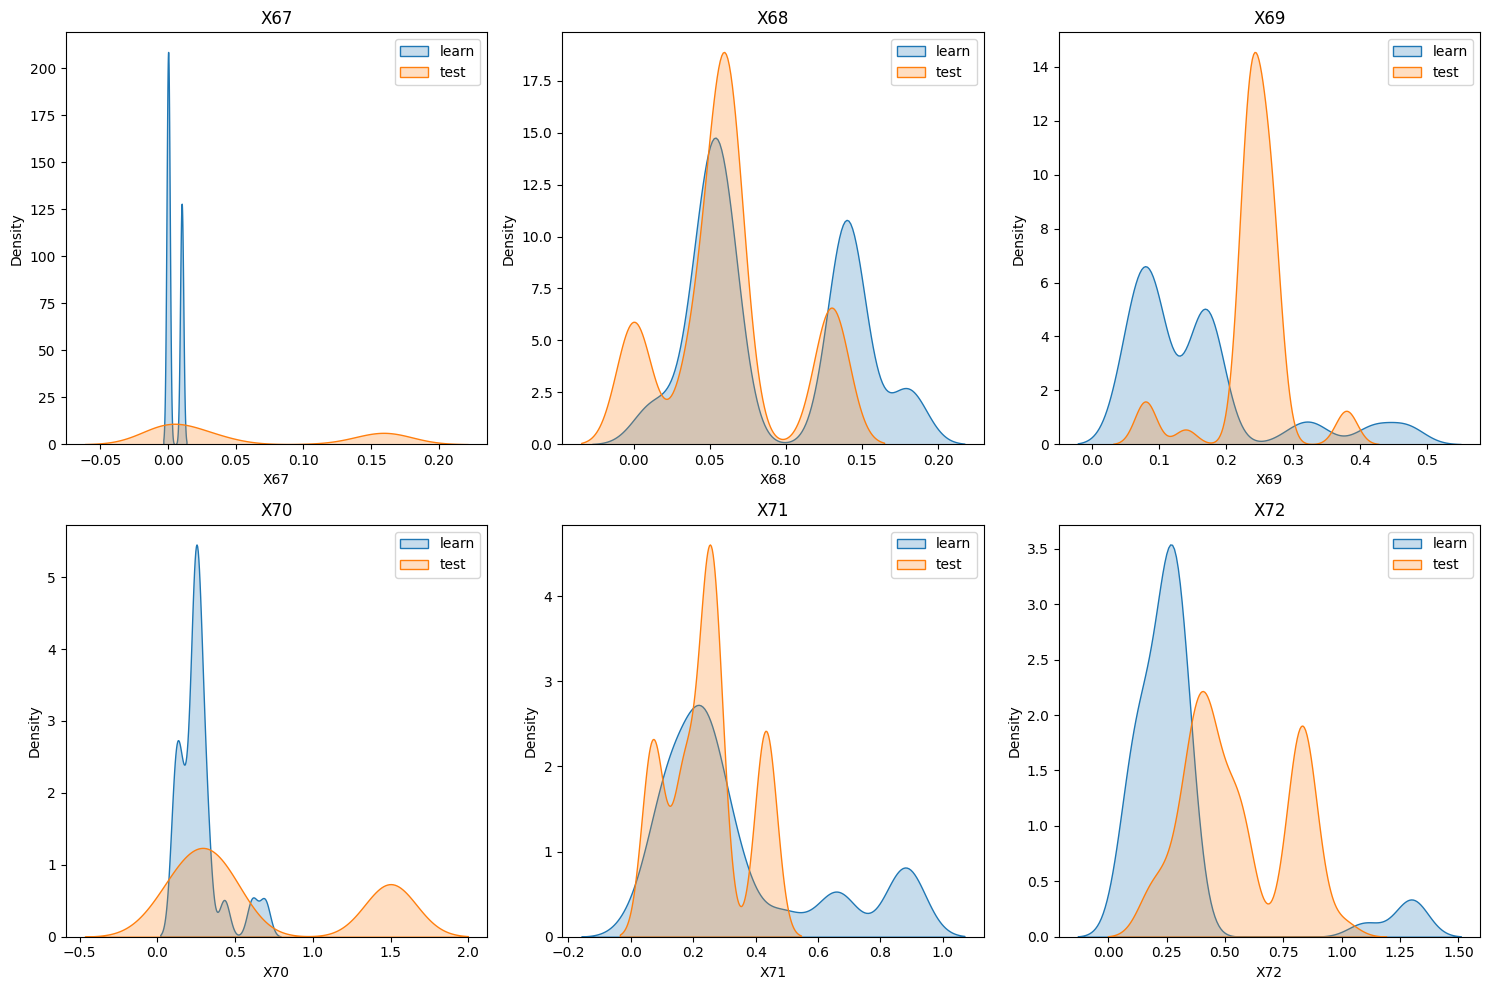

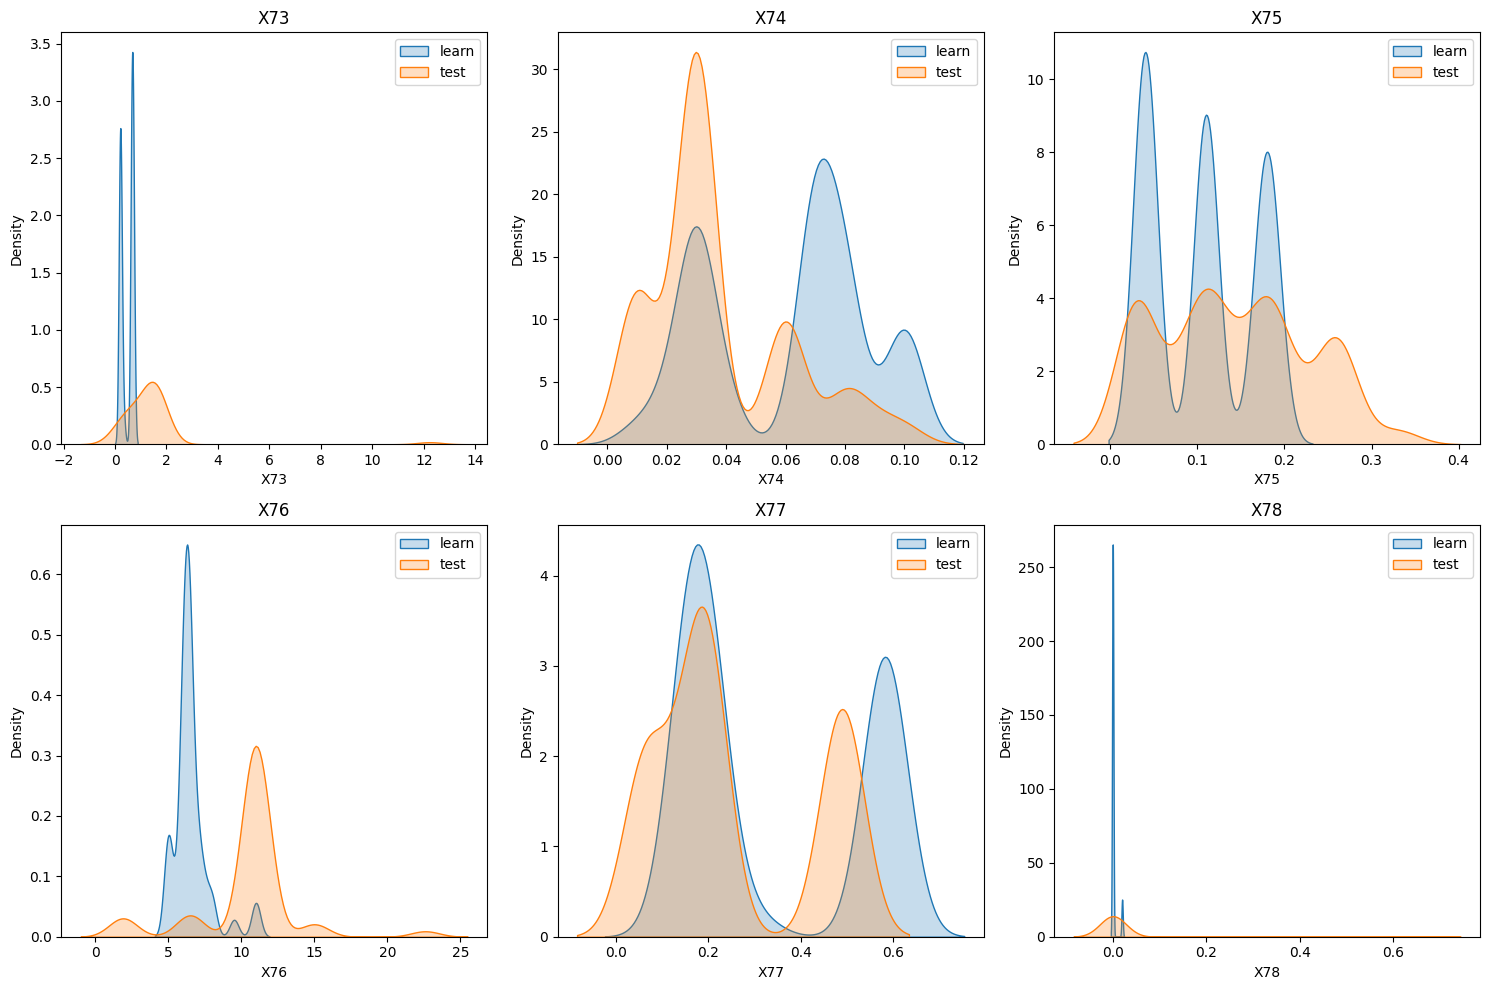

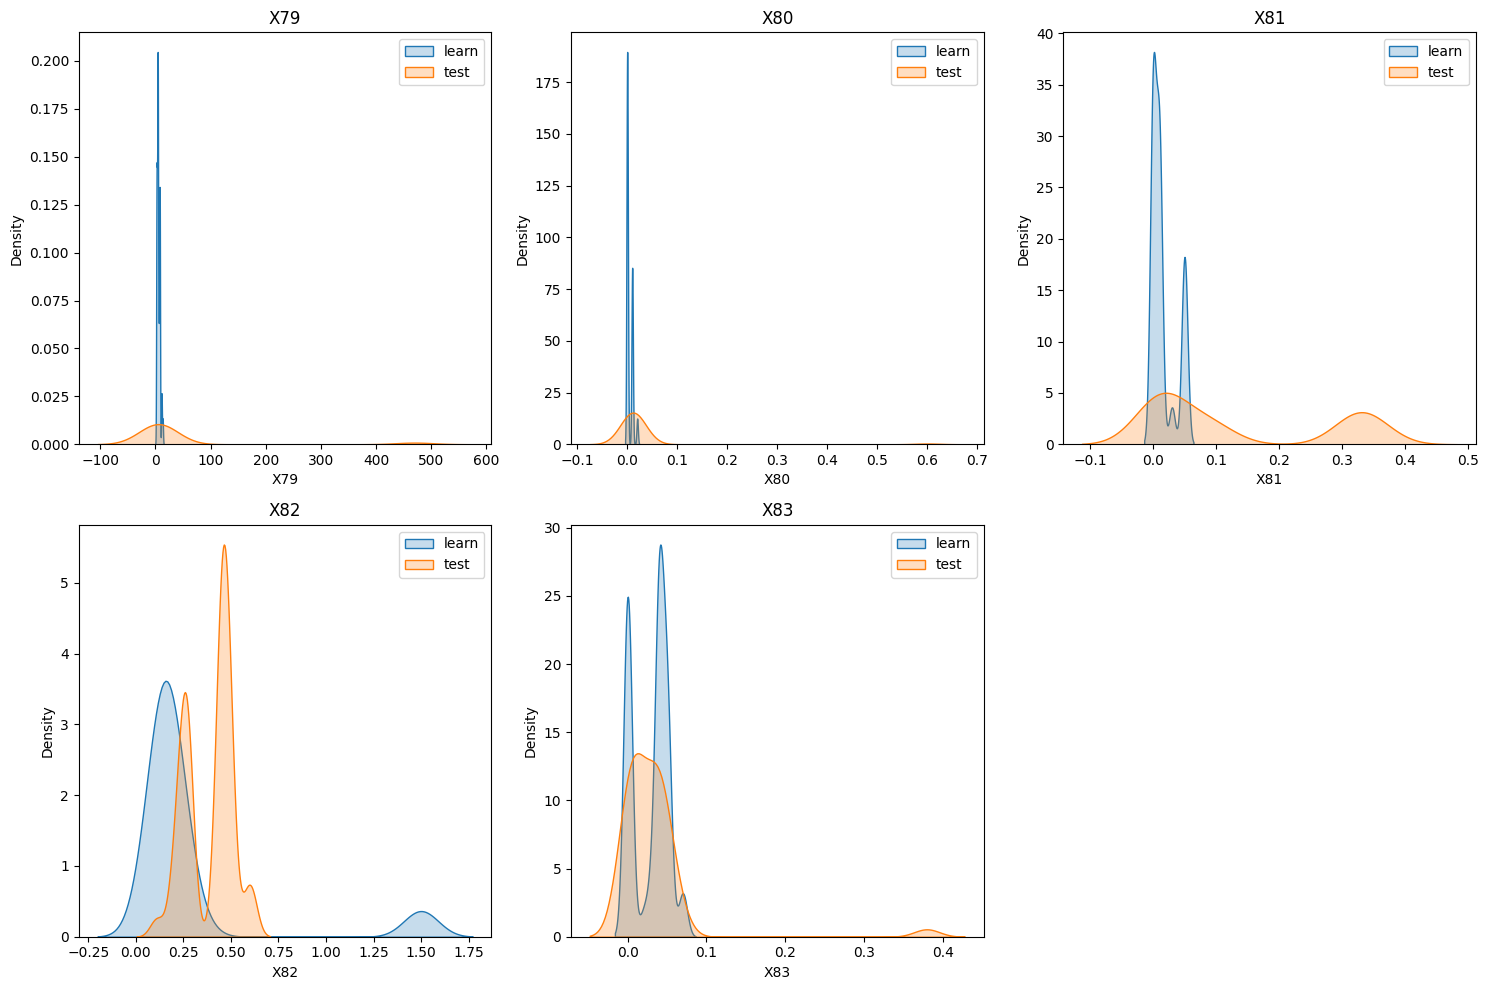

In [92]:
for fig_list in fig_lists:
    cols_to_plot = fig_list
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(cols_to_plot, 1):
        plt.subplot(2, 3, i)
        sns.kdeplot(learn[col], label='learn', fill=True)
        sns.kdeplot(test[col], label='test', fill=True)
        plt.title(col)
        plt.legend()
    plt.tight_layout()
    plt.savefig(f"../docs/output/learn_test_kde/{'_'.join(cols_to_plot)}.png")
    plt.show()

In [91]:
learn["X5"]

0       0.15
1       0.15
2       0.14
3       0.15
4       0.15
        ... 
1150    0.16
1151    0.16
1152    0.16
1153    0.16
1154    0.16
Name: X5, Length: 1155, dtype: float64

## データの期間を確認

process_end_time min: 2016-08-14 23:07:00
process_end_time max: 2016-12-24 20:05:00
訓練データ末尾: 2016-10-14
テストデータ開始: 2016-11-28


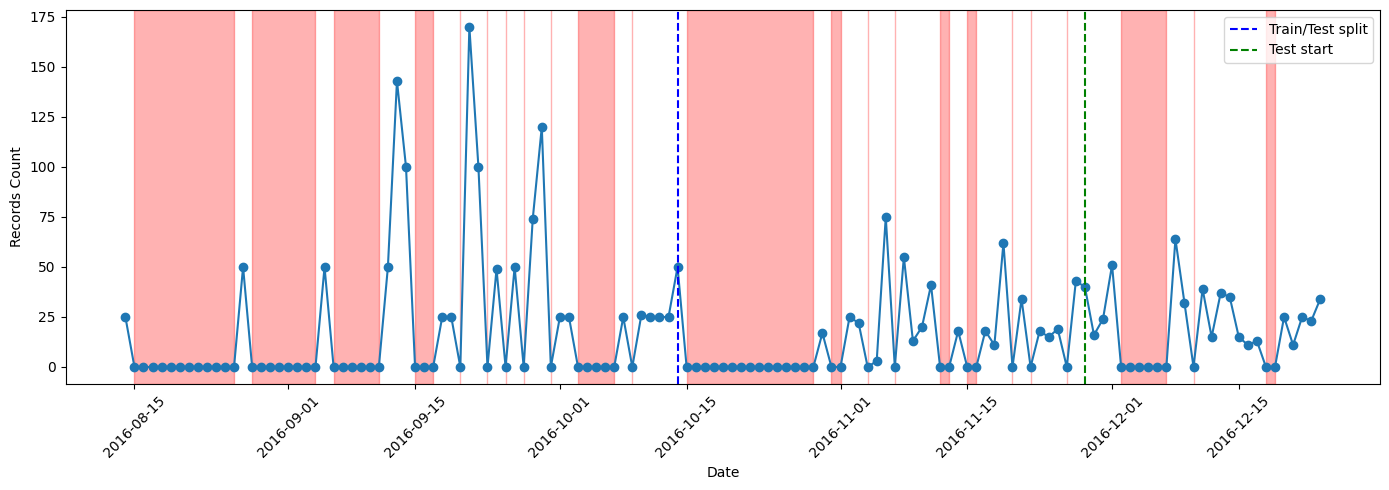

In [77]:
# process_end_time の日付の最小・最大を表示
print("process_end_time min:", df['process_end_time'].min())
print("process_end_time max:", df['process_end_time'].max())

# 日付ごとにカウント
date_counts = df['process_end_time'].dt.date.value_counts().sort_index()

# すべての日付の連続したindexを作成（記録の無い日付も含む）
full_dates = pd.date_range(start=df['process_end_time'].dt.date.min(), end=df['process_end_time'].dt.date.max(), freq='D')
full_date_series = pd.Series(index=full_dates, dtype=int)
full_date_series.update(date_counts)
full_date_series = full_date_series.fillna(0)

plt.figure(figsize=(14,5))
plt.plot(full_date_series.index, full_date_series.values, marker='o')

# 訓練とテストデータの分かれ目の線を入れる
# 学習・テストの最初と最後の日付（process_end_timeから取得）
learn_last_date = learn['process_end_time'].dt.date.max()
test_first_date = test['process_end_time'].dt.date.min()

print(f"訓練データ末尾: {learn_last_date}")
print(f"テストデータ開始: {test_first_date}")

plt.axvline(learn_last_date, color='blue', linestyle='--', label='Train/Test split')
plt.axvline(test_first_date, color='green', linestyle='--', label='Test start')

# 記録が一度も無い期間を色付け
zero_periods = (full_date_series == 0)
if zero_periods.any():
    in_gap = False
    gap_start = None
    for idx, is_zero in enumerate(zero_periods):
        if is_zero and not in_gap:
            gap_start = full_date_series.index[idx]
            in_gap = True
        if not is_zero and in_gap:
            gap_end = full_date_series.index[idx-1]
            plt.axvspan(gap_start, gap_end, color='red', alpha=0.3)
            in_gap = False
    if in_gap:
        gap_end = full_date_series.index[-1]
        plt.axvspan(gap_start, gap_end, color='red', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Records Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('../docs/output/学習データと訓練データのdatetime推移.png')
plt.show()


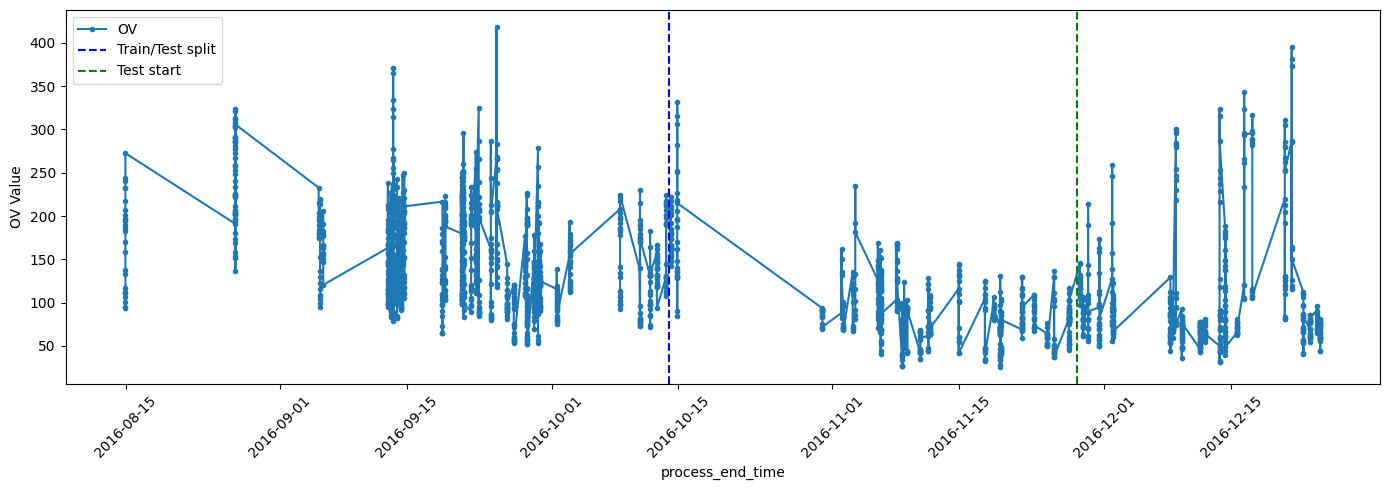

In [41]:
# OVの時系列推移をプロット

plt.figure(figsize=(14,5))
plt.plot(df['process_end_time'], df['OV'], marker='.', linestyle='-', label='OV')

plt.axvline(learn_last_date, color='blue', linestyle='--', label='Train/Test split')
plt.axvline(test_first_date, color='green', linestyle='--', label='Test start')

plt.xlabel('process_end_time')
plt.ylabel('OV Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('../docs/output/OVの時系列推移.png')
plt.show()


In [42]:
learn = pd.read_csv('../data/processed/learn.csv')
learn.head()

learn["process_end_time"] = pd.to_datetime(learn["process_end_time"])
learn["final_mes_time"] = pd.to_datetime(learn["final_mes_time"])

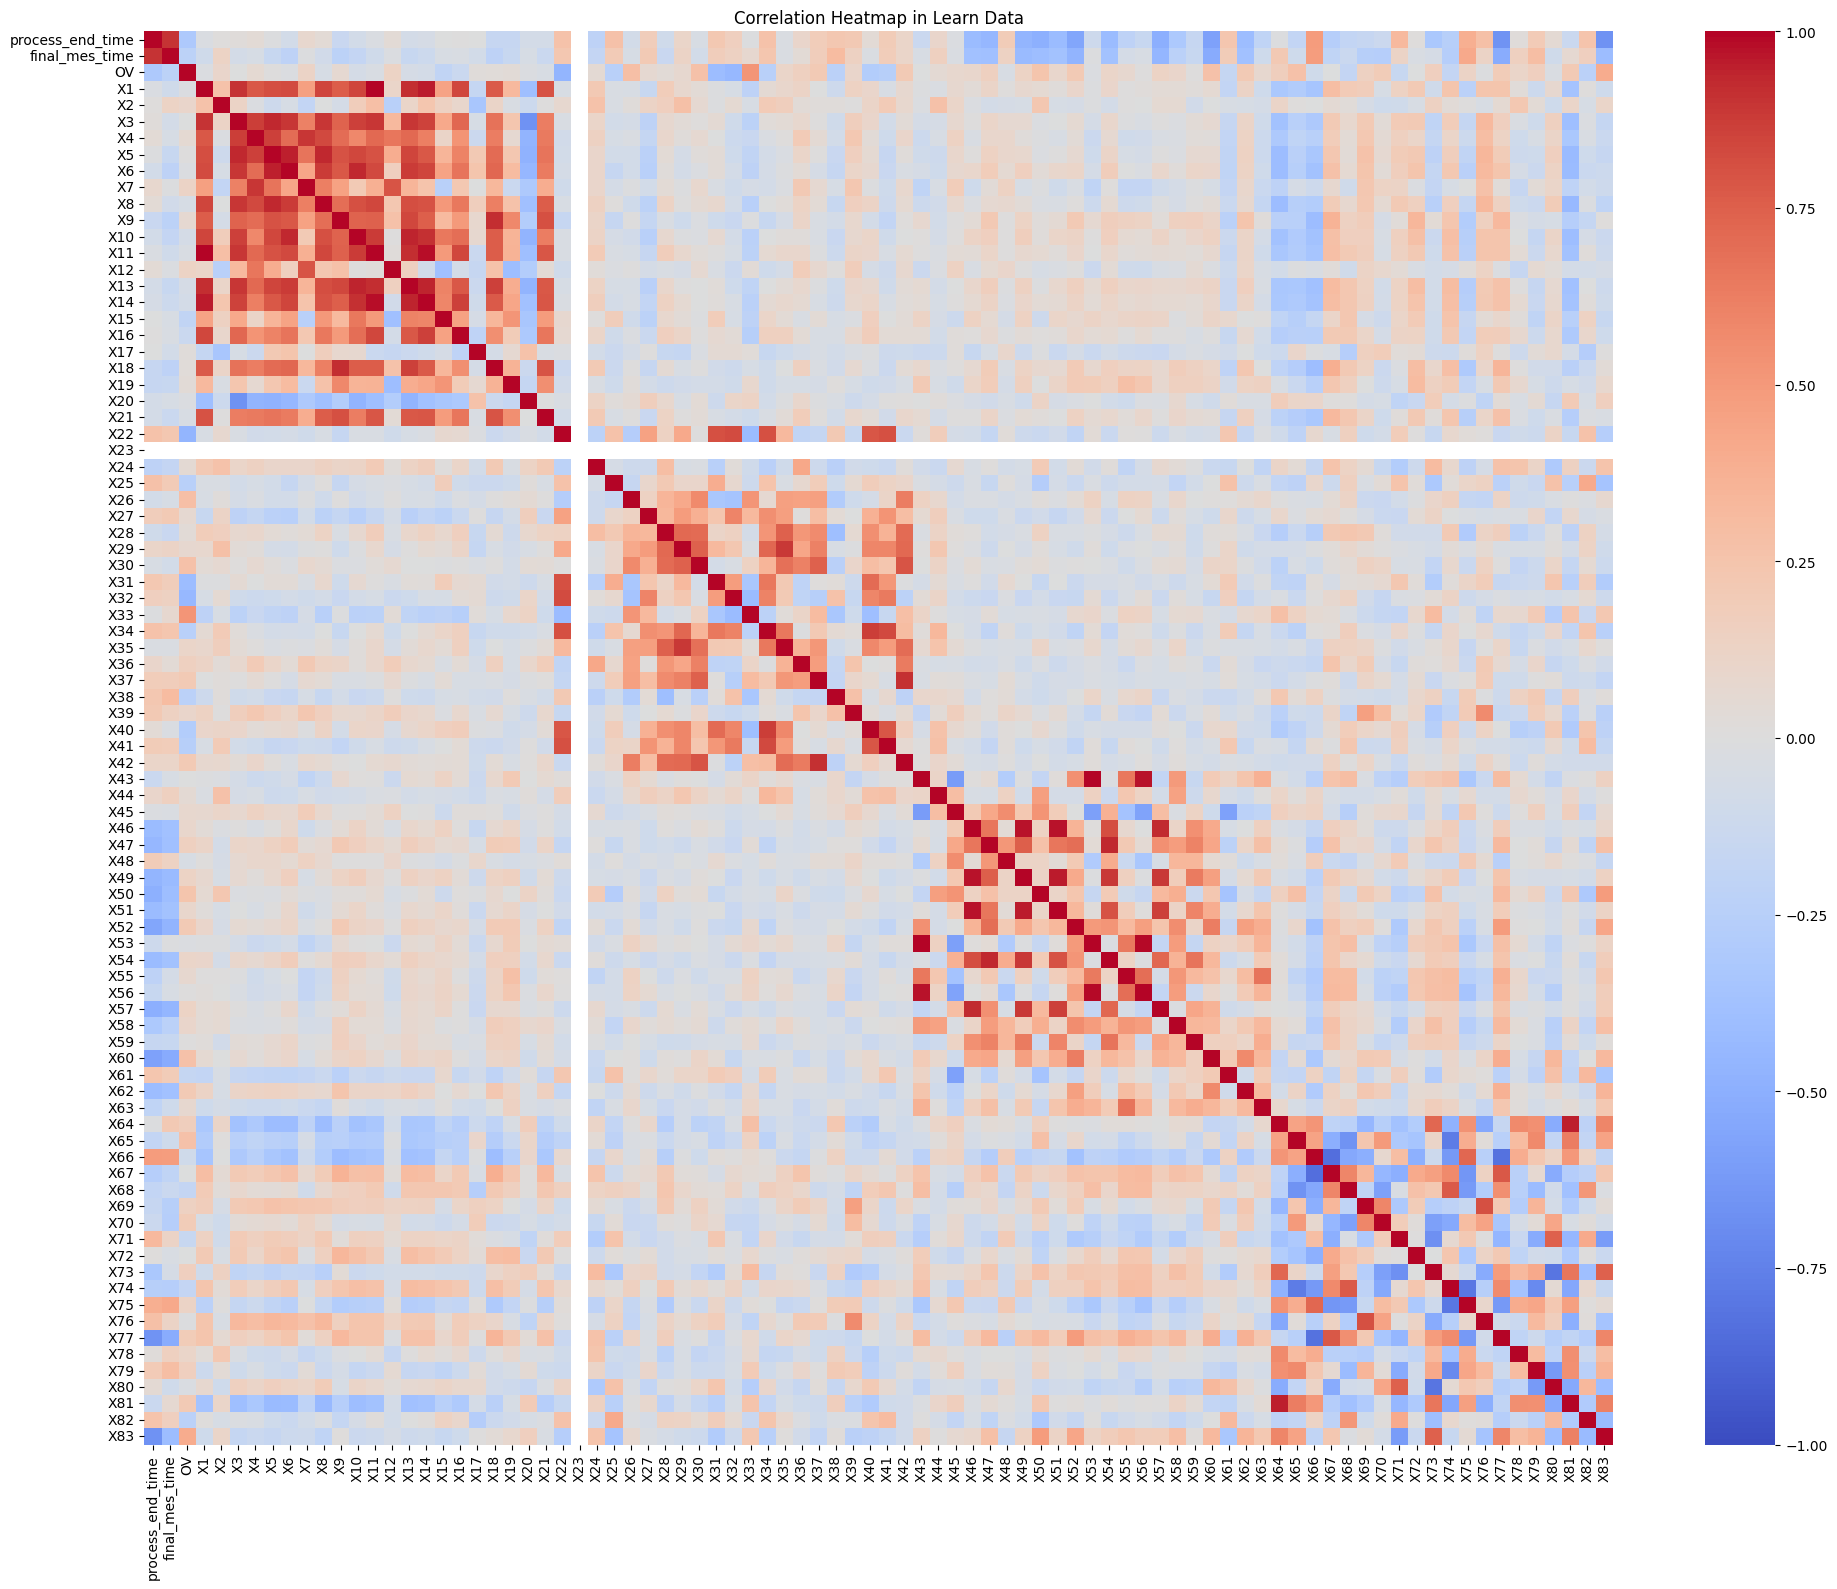

In [43]:
# learnデータの相関行列を計算
corr = learn.corr()

plt.figure(figsize=(20,16))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap in Learn Data')
plt.tight_layout()
plt.savefig('../docs/output/learn相関ヒートマップ.png')
plt.show()

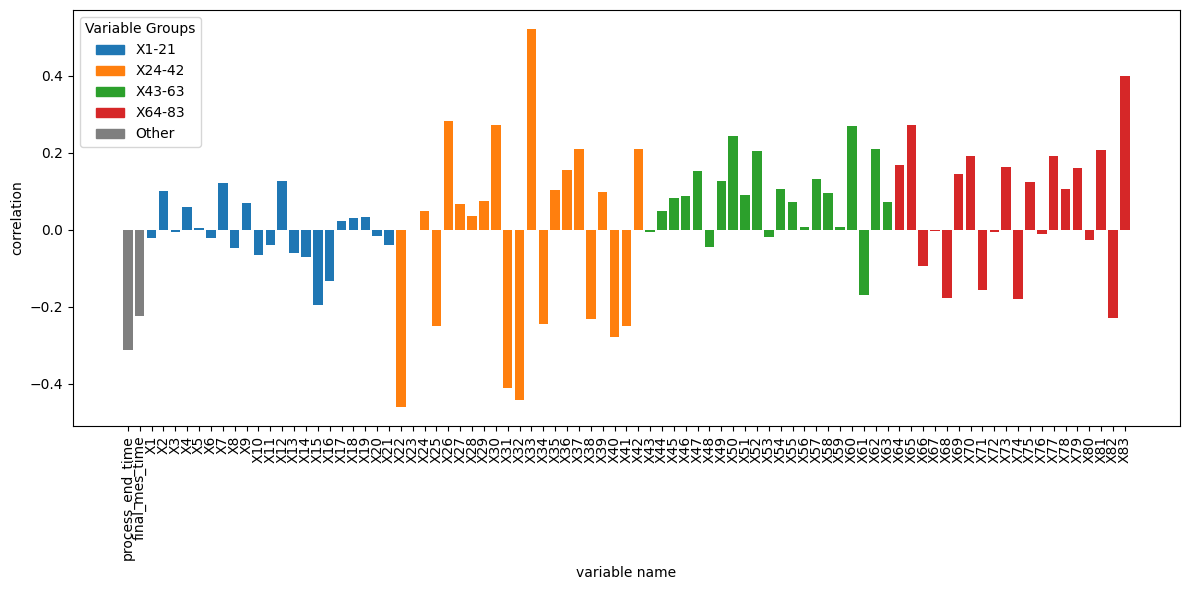

In [94]:
# OVとの相関を棒グラフで可視化（X1~X21, X24~X42, X43~X63, X64~X83ごとに色分け）
ov_corr = corr["OV"].drop("OV")
ov_corr_df = ov_corr.reset_index()
ov_corr_df.columns = ["variable", "correlation"]

def get_group(var):
    try:
        num = int(var[1:])
        if 1 <= num <= 21:
            return "X1-21"
        elif 22 <= num <= 42:
            return "X24-42"
        elif 43 <= num <= 63:
            return "X43-63"
        elif 64 <= num <= 83:
            return "X64-83"
        else:
            return "Other"
    except:
        return "Other"

ov_corr_df["group"] = ov_corr_df["variable"].apply(get_group)

# 色設定
color_dict = {
    "X1-21": "#1f77b4",
    "X24-42": "#ff7f0e",
    "X43-63": "#2ca02c",
    "X64-83": "#d62728",
    "Other": "#7f7f7f"
}
colors = ov_corr_df["group"].map(color_dict)
plt.figure(figsize=(12,6))
bars = plt.bar(ov_corr_df["variable"], ov_corr_df["correlation"], color=colors)
plt.ylabel("correlation")
plt.xlabel("variable name")
plt.xticks(rotation=90)



patches = [mpatches.Patch(color=color_dict[k], label=k) for k in color_dict]
plt.legend(handles=patches, title="Variable Groups")

plt.tight_layout()
plt.savefig("../docs/output/learn_OV_corr_bar_colored.png")
plt.show()
